# stroke dataset

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("stroke_fix.csv")
df.head()
# df.shape

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,3,1
1,1,80.0,0,1,1,1,2,105.92,32.5,1,1
2,2,49.0,0,0,1,1,1,171.23,34.4,4,1
3,2,79.0,1,0,1,2,2,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,3,1


In [3]:
# df.describe()
# df.isna().sum()
df = df.dropna()
df = df.drop(columns='id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [4]:
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'],['1','2'])
df['gender'].value_counts()
df['gender'] = df['gender'].replace(['Male','Female','Other'],['1','2','3'])
df['ever_married'] = df['ever_married'].replace(['Yes', 'No'],[1, 0])
df['stroke'].value_counts() ##data tidak berimbang, 1 < 0
df['smoking_status'] = df['smoking_status'].replace(['never smoked','Unknown','formerly smoked','smokes'],['1','2','3','4'])
df['work_type'].value_counts()
df['work_type'] = df['work_type'].replace(['Private','Self-employed', 'children', 'Govt_job','Never_worked'],
                                         ['1','2','3','4','5'])
df

# df['Outcome'].value_counts() ##diabetes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,3,1
2,1,80.0,0,1,1,1,2,105.92,32.5,1,1
3,2,49.0,0,0,1,1,1,171.23,34.4,4,1
4,2,79.0,1,0,1,2,2,174.12,24.0,1,1
5,1,81.0,0,0,1,1,1,186.21,29.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,2,13.0,0,0,0,3,2,103.08,18.6,2,0
5106,2,81.0,0,0,1,2,1,125.20,40.0,1,0
5107,2,35.0,0,0,1,2,2,82.99,30.6,1,0
5108,1,51.0,0,0,1,1,2,166.29,25.6,3,0


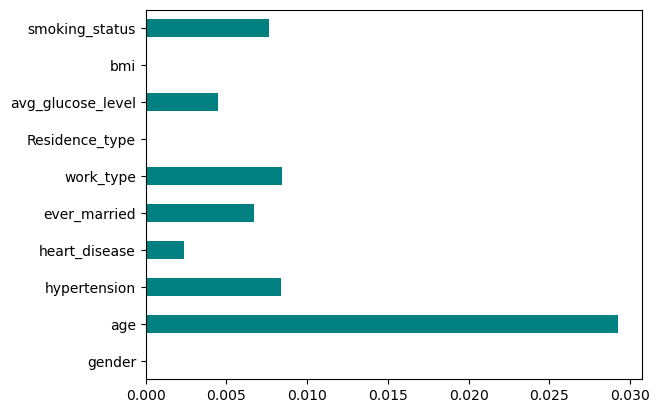

In [5]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

X = df.drop(columns='stroke', axis=1)
Y = df['stroke']
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

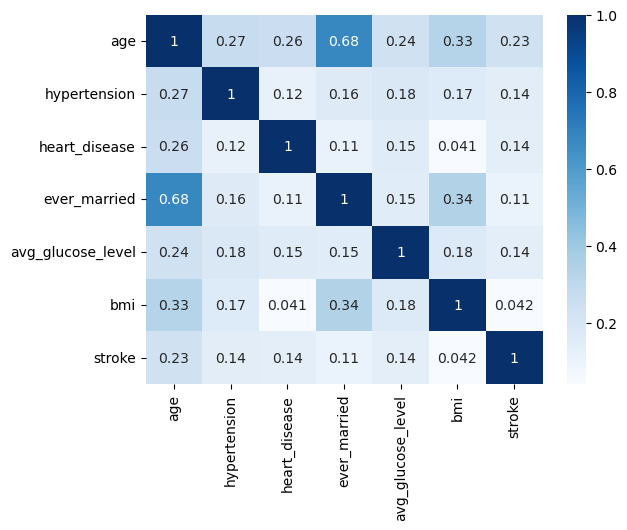

In [6]:
import seaborn as sns
# heatmp
cor = df.corr()
# sns.heatmap(df)
sns.heatmap(cor,  annot=True, cmap="Blues")
plt.show()

# print(df.head())

In [7]:
df.to_csv("stroke_cleaned.csv")
# save dataset

# diabetes dataset

In [13]:
df2 = pd.read_csv("diabetes_cleaned.csv")
df2
# df.shape

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
395,2,174,44.5,24,1
396,1,102,39.5,42,1
397,11,120,42.3,48,1
398,9,140,32.7,45,1


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


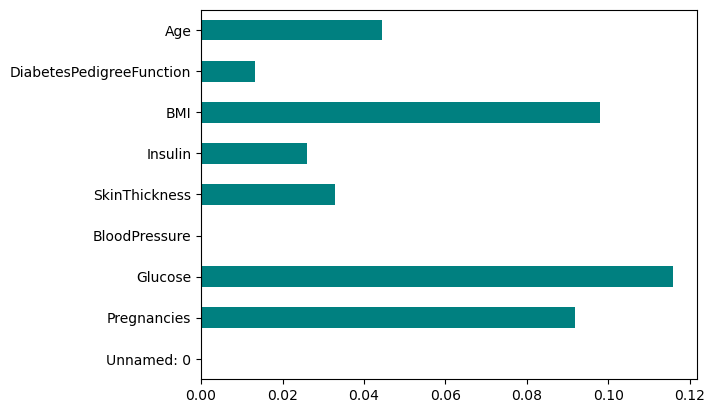

In [56]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

X = df2.drop(columns='Outcome', axis=1)
Y = df2['Outcome']
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, df2.columns[0:len(df2.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

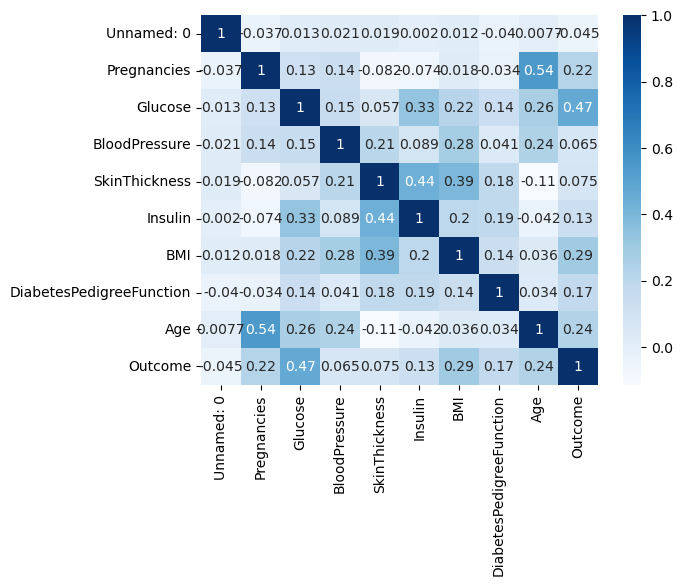

In [57]:
import seaborn as sns
# heatmp
cor = df2.corr()
# sns.heatmap(df)
sns.heatmap(cor,  annot=True, cmap="Blues")
plt.show()

# print(df.head())

# combined dataset

In [16]:
df3 = pd.read_csv("combined.csv")
df3.head()
# df3.info()

,age,hypertension,ever_married,work_type,Pregnancies,Glucose,BMI,smoking_status,outcome
0,67.0,0,1,1,0,0,0.0,3,1
1,80.0,0,1,1,0,0,0.0,1,1
2,49.0,0,1,1,0,0,0.0,4,1
3,79.0,1,1,2,0,0,0.0,1,1
4,81.0,0,1,1,0,0,0.0,3,1


In [17]:
df4 = df3.dropna()
df4.info()
# df3['Heart_ stroke'].value_counts() ##tidak seimbang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             818 non-null    float64
 1   hypertension    818 non-null    int64  
 2   ever_married    818 non-null    int64  
 3   work_type       818 non-null    int64  
 4   Pregnancies     818 non-null    int64  
 5   Glucose         818 non-null    int64  
 6   BMI             818 non-null    float64
 7   smoking_status  818 non-null    int64  
 8   outcome         818 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.6 KB


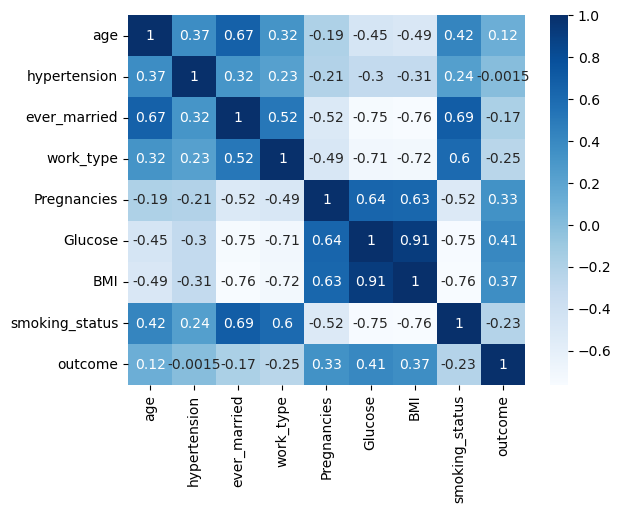

In [32]:
import seaborn as sns
# heatmp
cor = df3.corr()
# sns.heatmap(df)
sns.heatmap(cor,  annot=True, cmap="Blues")
plt.show()

# print(df.head())

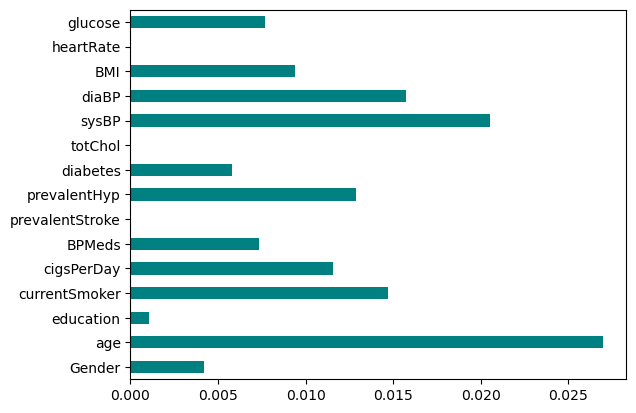

In [118]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

X = df4.drop(columns='Heart_ stroke', axis=1)
Y = df4['Heart_ stroke']
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, df4.columns[0:len(df4.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

# stop, just checking

In [18]:
# memisahkan data dari class
X = df3.drop(columns='outcome', axis=1)
Y = df3['outcome']

In [19]:
# normalisation: merubah ke rentang tertentu
# why? mengurangi kompleksitas data, mrnghindari overfitting, mempercepat proses pelatihan, menormalkan residu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
standarized_data = scaler.fit_transform(X)
standarized_data

array([[0.81563422, 0.        , 1.        , ..., 0.        , 0.        ,
        0.75      ],
       [0.9754179 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.59439528, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.58210423, 0.        , 0.        , ..., 0.60606061, 0.63040238,
        0.        ],
       [0.54523107, 0.        , 0.        , ..., 0.70707071, 0.48733234,
        0.        ],
       [0.32399213, 0.        , 0.        , ..., 0.74242424, 0.73472429,
        0.        ]])

In [19]:
import tensorflow as tf
# no module

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [22]:
standarized_data = scaler.transform(X)
standarized_data

array([[ 1.09344297, -0.33151926,  1.22849601, ..., -0.91824082,
        -0.93046687,  1.40064712],
       [ 1.72902663, -0.33151926,  1.22849601, ..., -0.91824082,
        -0.93046687, -0.08058022],
       [ 0.21340406, -0.33151926,  1.22849601, ..., -0.91824082,
        -0.93046687,  2.14126079],
       ...,
       [ 0.16451301, -0.33151926, -0.81400346, ...,  0.86240516,
         1.49906718, -0.82119388],
       [ 0.01783985, -0.33151926, -0.81400346, ...,  1.15917949,
         0.94768357, -0.82119388],
       [-0.86219906, -0.33151926, -0.81400346, ...,  1.2630505 ,
         1.90111774, -0.82119388]])

In [23]:
X = standarized_data
Y = df3['outcome']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, stratify=Y, random_state=42)
# random 42, k3 = 58%, k5= 56, k7 = 51, k8=52, k9= 

In [25]:
X.shape, X_train.shape, X_test.shape

((818, 8), (654, 8), (164, 8))

In [26]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# sk_folds = StratifiedKFold(n_splits = 5)

# scores = cross_val_score(knn, X, Y, cv = sk_folds )
# print(scores)
# print(scores.mean())
# print(len(scores))

In [27]:
y_predict = knn.predict(X_test)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        82
           1       0.72      0.67      0.69        42
           2       0.72      0.57      0.64        40

    accuracy                           0.69       164
   macro avg       0.70      0.67      0.68       164
weighted avg       0.69      0.69      0.69       164



D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
# accuracy manual
cm = confusion_matrix(Y_test, y_predict)
cm

array([[62, 11,  9],
       [14, 28,  0],
       [17,  0, 23]], dtype=int64)

In [29]:
X_train_prediction = knn.predict(X_train)
training_data_accuration = accuracy_score(X_train_prediction, Y_train)
training_data_accuration # 0.71%(n=5), 0.77%(n=3)

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8058103975535168

In [30]:
X_test_prediction = knn.predict(X_test)
training_data_accuration2 = accuracy_score(X_test_prediction, Y_test)
training_data_accuration2 # 0.54%(n=5), 0.56%(n=3)

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6890243902439024

In [31]:
# ujicoba
import numpy as np
from sklearn.preprocessing import StandardScaler

input_data = (67.0,0,1,1,0,0,0,3) ##hasilnya harusnya [1]
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshape)
# std_data
prediction = knn.predict(std_data)
prediction
# hasil sudah benar

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)

In [128]:
import pickle
filename = 'monkeypox_model5.sav'
pickle.dump(knn, open(filename, 'wb'))